# Bank Loan Term Deposit Sale

#### Description
The data is from direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. The classification goal is to predict if the customer will subscribe a term deposit (variable y). Often, more than one contact to the same customer was required, in order to access if the product (bank term deposit) would be ‘yes’ or ‘no’ for subscription.

Let's apply `Ensemble Technique` to design a classification model which can predict the outcome of a potential client.


In [0]:
#Utilities
from time import time

# Numerical calculation
import numpy as np

# Data handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical testing
from statsmodels.formula.api import ols
from scipy.stats import shapiro

# Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Sample and parameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV

#Predictive Modeling
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve

In [0]:
# Configure for any default setting of any library
%matplotlib inline
sns.set(style='whitegrid', palette='deep', font='helvetica', font_scale=1.5, color_codes=True)

## Load the Dataset


In [0]:
# Load the dataset into a Pandas dataframe called tds
tds = pd.read_csv('bank-full.csv')

In [8]:
# Check the head of the dataset
tds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
# Check the tail of the dataset
tds.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


**Comments**
* To take a closer look at the data, pandas library provides **“.head()”** function which returns first five observations and **“.tail()”** function which returns last five observations of the data set.

---

## Deliverable -1 (Exploratory Data Analysis)
1. Univariate analysis - data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

2. Bivariate analysis between the predictor variables and between the predictor variables and
target column. Comment on your findings in terms of their relationship and degree of
relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair
plots, histograms or density curves. Select the most appropriate attributes

3. Strategies to address the different data challenges such as data pollution, outliers and missing
values

### Inspect the Dataset
The dataset is divided into two parts, namely, **feature matrix** and the **response vector**.

- Feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of **dependent features**. In above dataset, features are *age*, *job*, *marital*, *education*, *default*, *balance*, *housing*, *loan*, *contact*, *day*, *month*, *duration*, *campaign*, *pdays*, *previous*, *poutcome*.
- Response vector contains the value of **Target variable**(prediction or output) for each row of feature matrix. In above dataset, the class variable name is *Target*.

In [10]:
# Get the shape and size of the dataset
tds.shape

(45211, 17)

In [11]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
tds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Observations**
- The dataset comprises of **45211 rows** and **17 columns**
- Few columns are of type integer and few are of type object - the categorical features
- There are **No null/missing values** present in the dataset

In [12]:
# List the numerical and categorical columns
numeric_cols = tds.select_dtypes(include=[np.number]).columns.tolist()
categ_cols = tds.select_dtypes(include=[np.object]).columns.tolist()
print('The numeric attributes are:', numeric_cols)
print('The categorical attributes are:', categ_cols)

The numeric attributes are: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
The categorical attributes are: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']


In [13]:
# Count the number of discrete classes in each categorical feature
tds[categ_cols].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
Target        2
dtype: int64

In [14]:
# Describe the dataset with various summary and statistics
tds.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


**Observations:**
- *Age* columns has a minimum of 18 and maximum of 95 value which indicates the campaign covers a wide age group of clients.
- *Balance* column indicates there are clients whose bank balance is in negative as well.
- *Day* column has a min of 1, max of 31 and mean of 15 which clearly shows that the data covers every day in a month, there is no exceptions.
- Maximum value of *duration* column indicates clients were contacted for more than 80 mins in a single call.
- There are extreme outliers in the *campaign* and *previous* columns.
- Negative sign in the *pdays* column indicates there are clients who were not previously contacted

In [15]:
# Compare class wise mean
pd.pivot_table(tds, index='Target', aggfunc=['mean'])

mean                         ...                                 
              age      balance  campaign  ...    duration      pdays  previous
Target                                    ...                                 
no      40.838986  1303.714969  2.846350  ...  221.182806  36.421372  0.502154
yes     41.670070  1804.267915  2.141047  ...  537.294574  68.702968  1.170354

[2 rows x 7 columns]

**Observations:**
- There is no age group variations in the clients who turned up for the term deposit sale vs. who turned down.
- Clients tend to turn down for the term deposite tend to hung up the call quickly as compared to who turned up for the sale which is also obvious from the data.

### Understanding the target variable

In [16]:
# Find count of unique target variable
len(tds.Target.unique())
# OR
tds.Target.nunique()

2

In [17]:
# What are the different values for the dependant variable
tds.Target.unique()

array(['no', 'yes'], dtype=object)

In [18]:
# Find out the value counts in each outcome category
tds.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

**Observation**
- The ratio of yes to no candidate in the dataset is close to **1:7**, which indicates its a highly unbalanced dataset

---

### Univariate Analysis
Let's explore the spread of data points or the observations for each independent attribute. We will be using the density curve plus histogram and boxplot for numerical features and count plot for discrete features.

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


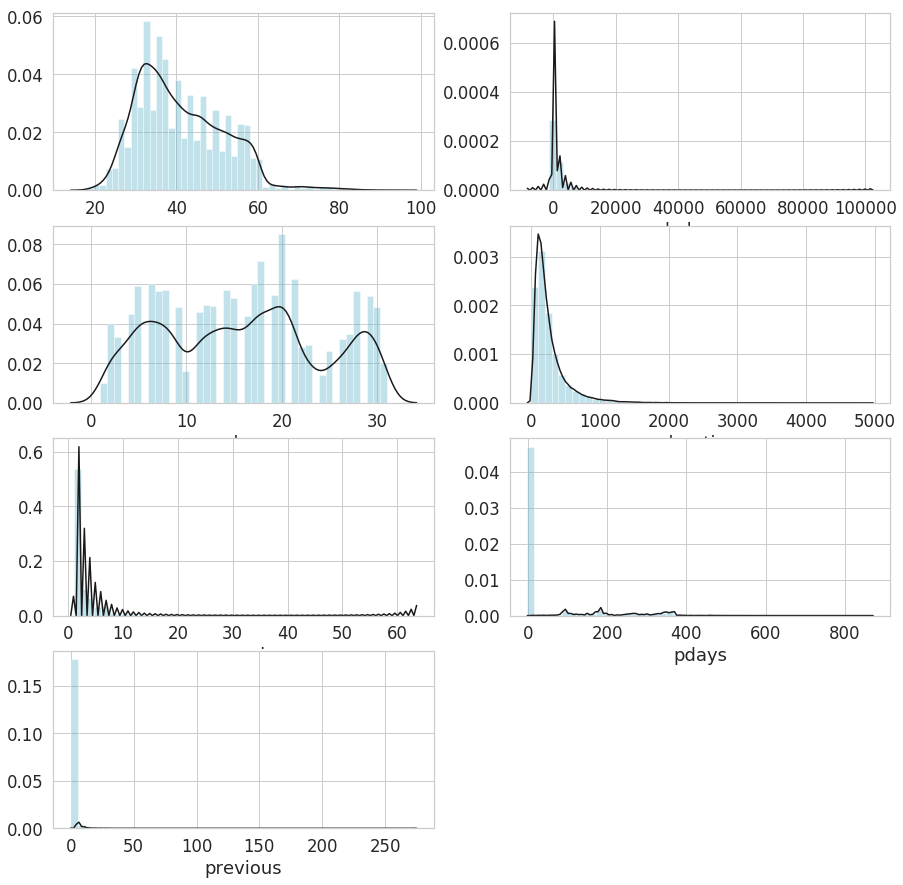

In [19]:
# Check for distribution skewness
plt.figure(figsize=(15,15))
index = 1
for col in numeric_cols:
    plt.subplot(round(len(numeric_cols) / 2), 2, index)
    sns.distplot(tds[col], kde_kws={"color": "k"}, hist_kws={"color": "c"})
    index += 1

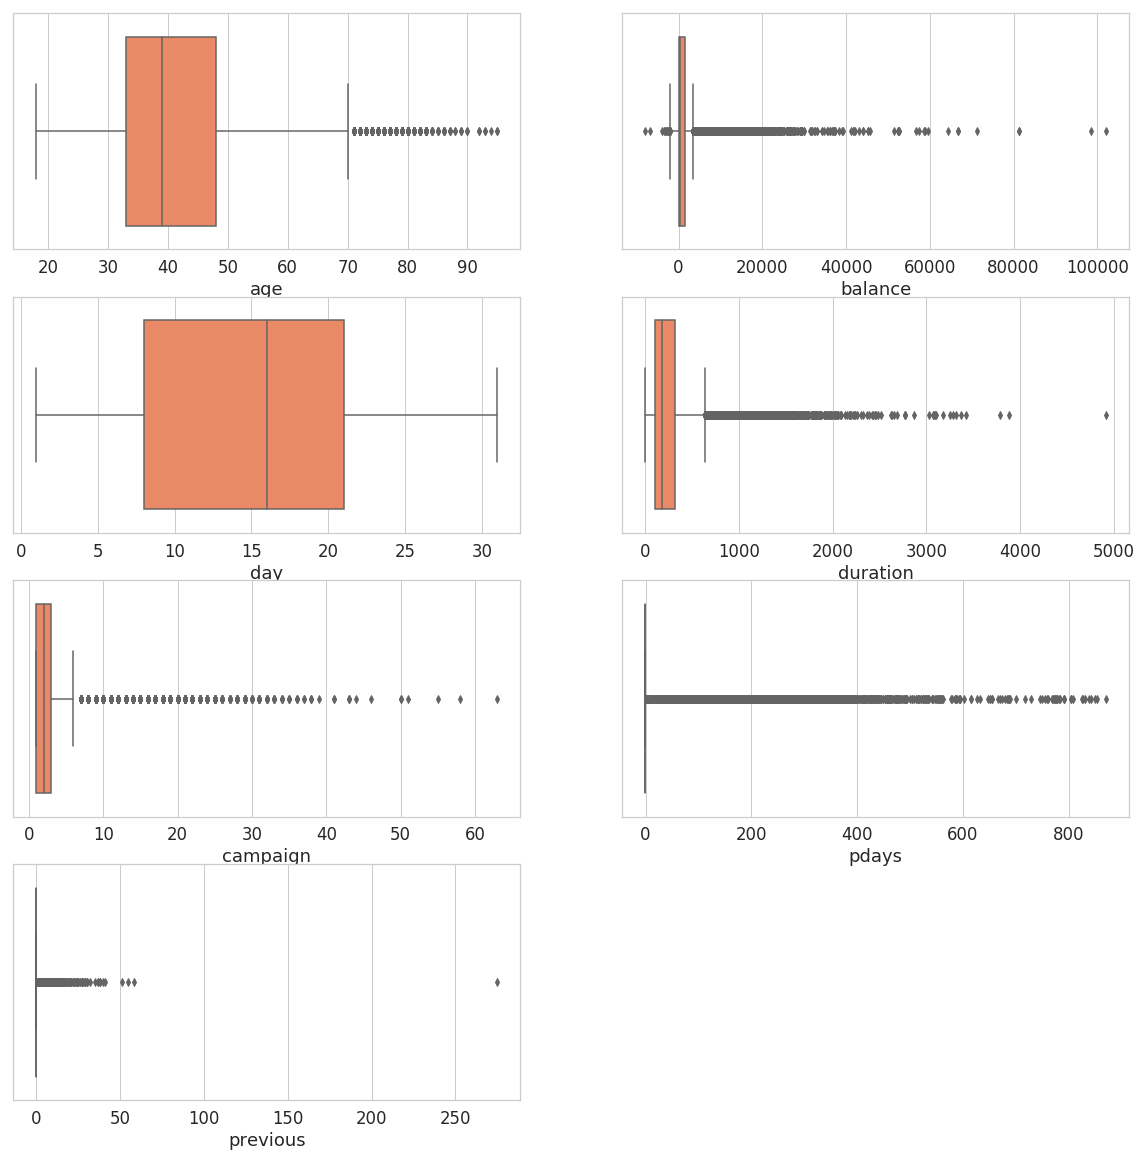

In [20]:
# Check the distribution Central Tendency
plt.figure(figsize=(20,20))
index = 1
for col in numeric_cols:
    plt.subplot(round(len(numeric_cols) / 2), 2, index)
    sns.boxplot(tds[col], color='coral')
    index += 1

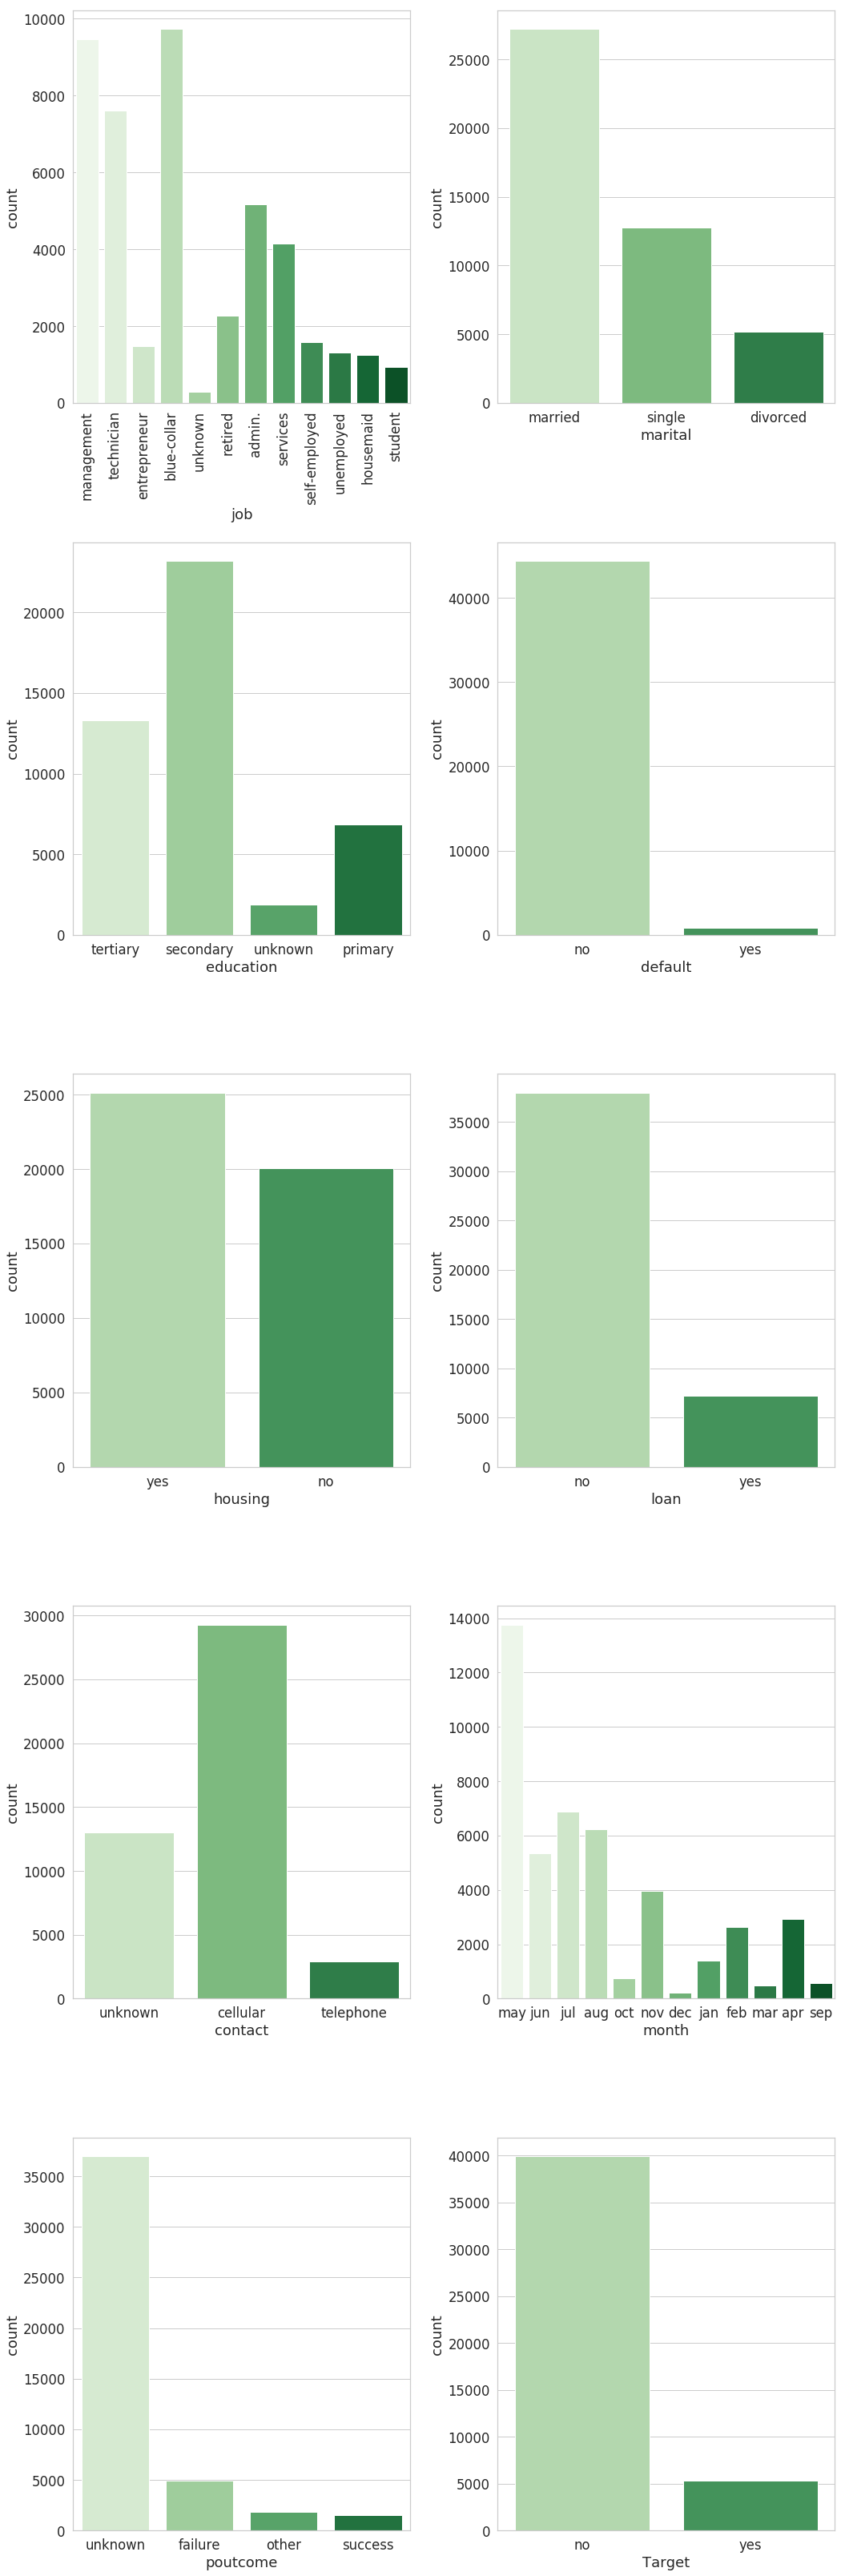

In [21]:
# Check the frequency inside each categorical features
plt.figure(figsize=(15,45))
index = 1
for col in categ_cols:
    plt.subplot(round(len(categ_cols) / 2), 2, index)
    sns.countplot(col, data=tds, palette='Greens')
    if col == 'job':
        plt.xticks(rotation='vertical')
    index += 1
plt.tight_layout()

### Bivariate Analysis
Let's explore the relationship among the predictor variables and between the predictor variables and target column. We will be using the density curve plus histogram, boxplot and pairplots

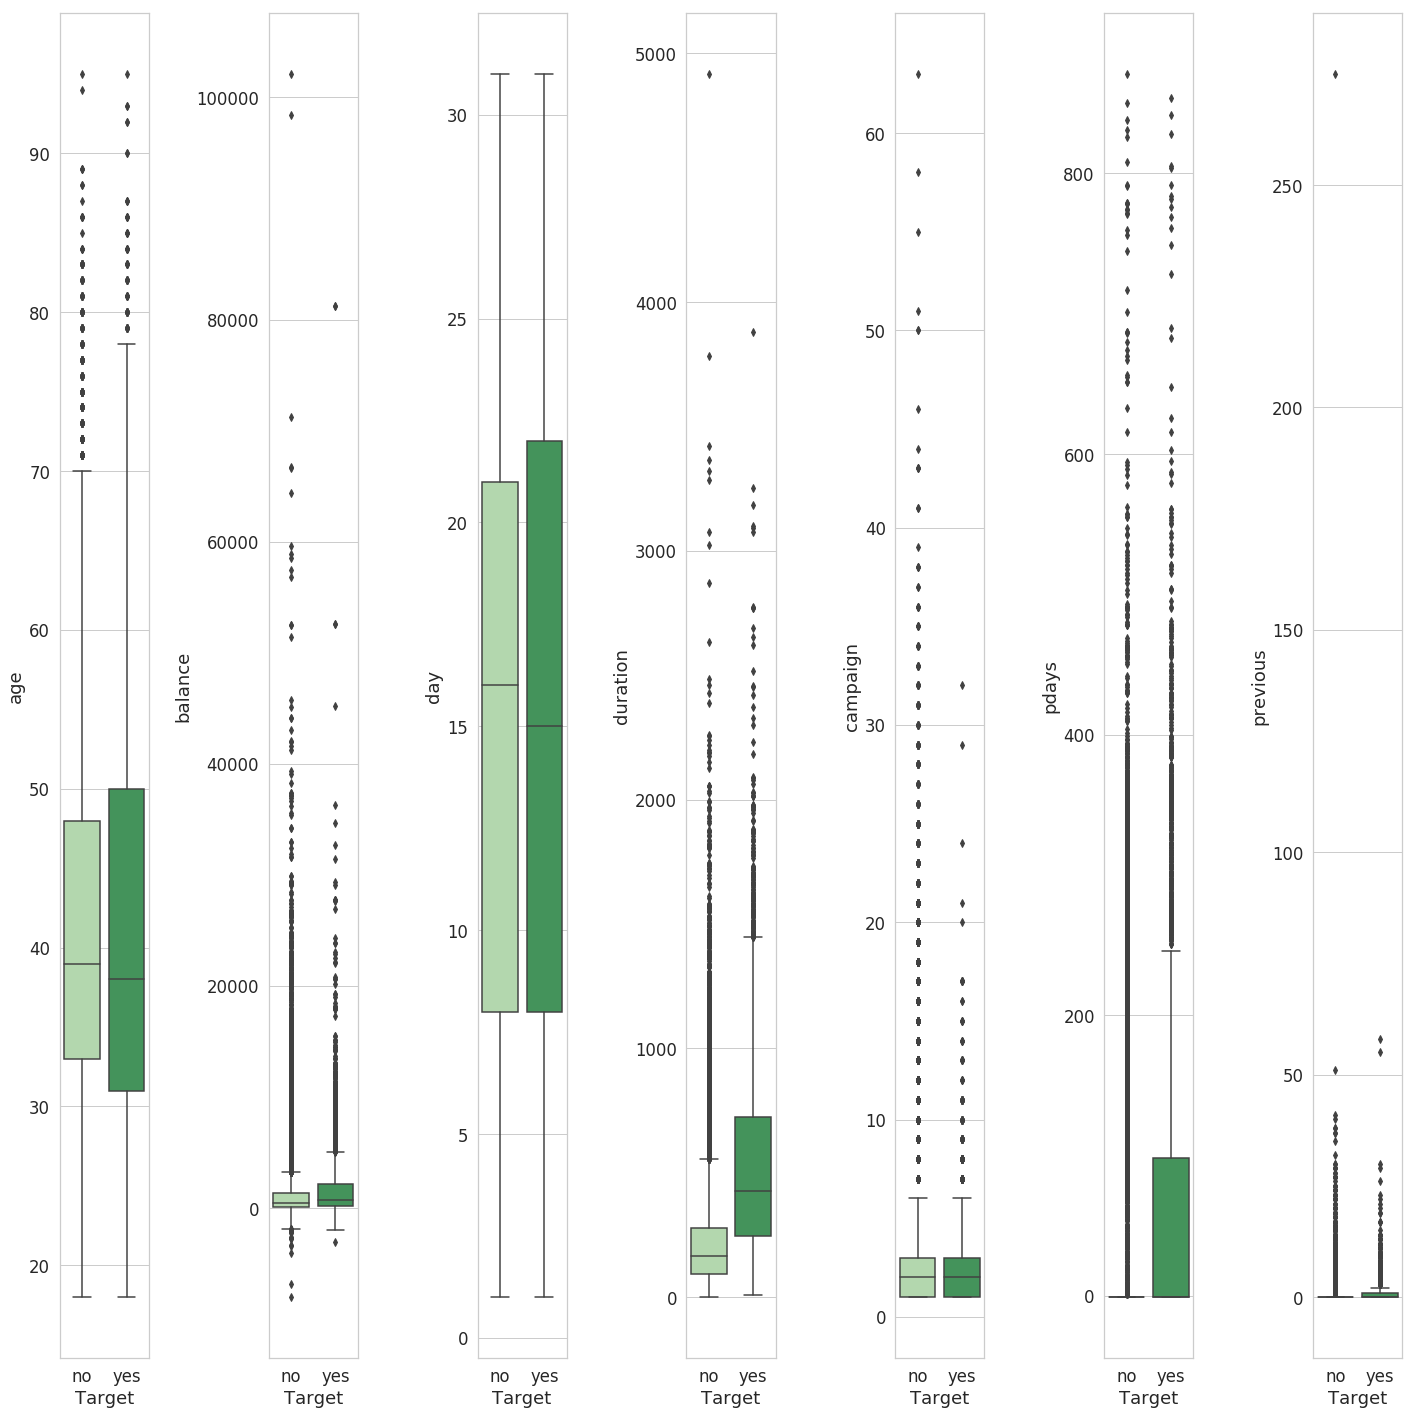

In [22]:
# Check the distribution Central Tendency for different Outcomes
plt.figure(figsize=(20,20))
index = 1
for col in numeric_cols:
    plt.subplot(1, len(numeric_cols), index)
    sns.boxplot(tds.Target, tds[col], palette='Greens')
    index += 1
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


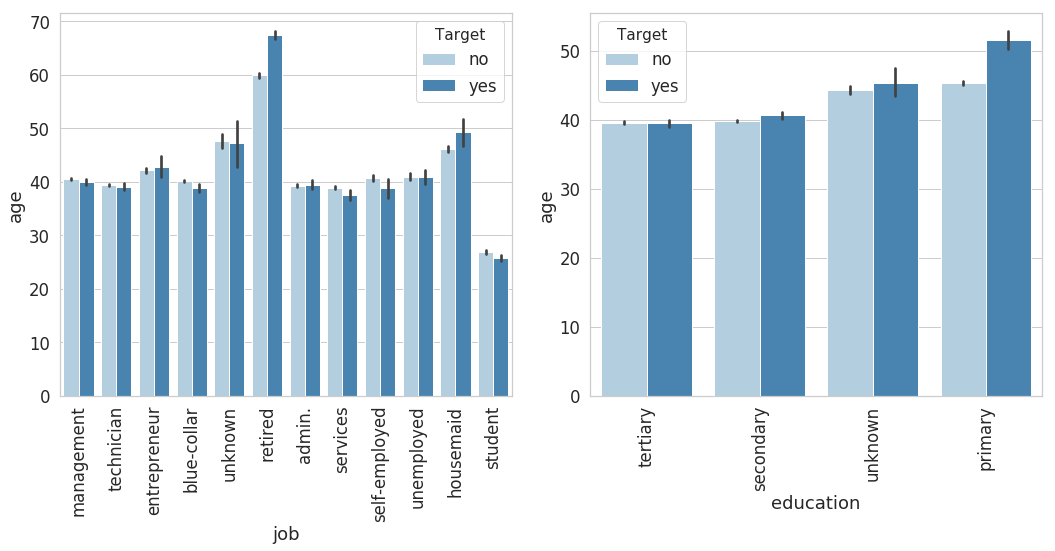

In [23]:
# Check the distribution Central Tendency for different Outcomes
plt.figure(figsize=(15,8))
index = 1
for col in ['job', 'education']:
    plt.subplot(1, 2, index)
    sns.barplot(tds[col], tds.age, tds.Target, palette='Blues')
    plt.xticks(rotation='vertical')
    index += 1
plt.tight_layout()

**Observations**
- Except for age and day columns, all others hve extreme outliers.
- Dataset consists of people of higher age ranges in retured and housemaid job category
- People with higher age range are under primary education category whereas secondary education observations are highest in number

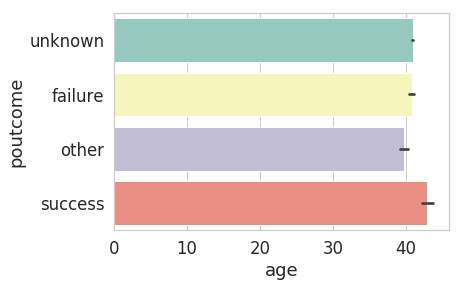

In [24]:
sns.barplot(tds.age, tds.poutcome, palette="Set3")

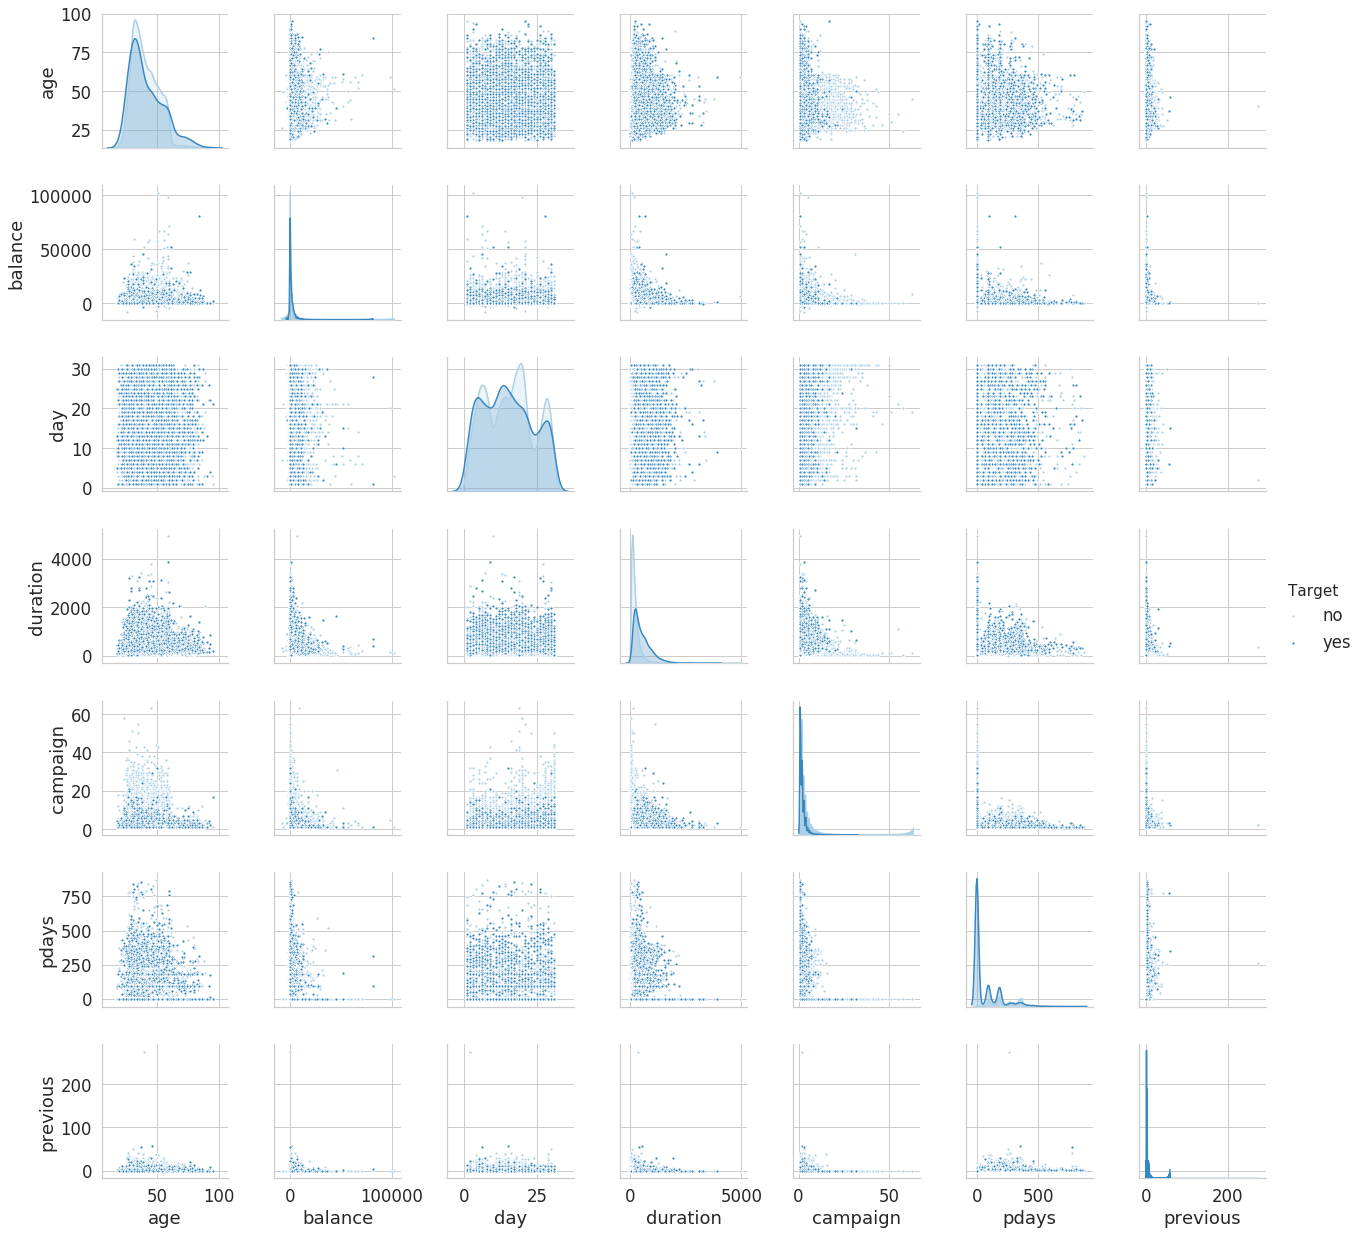

In [25]:
# Pairwise relationship of numerical features in each of the category of Target
sns.pairplot(tds, hue='Target', diag_kind='kde', palette='Blues', markers='.')

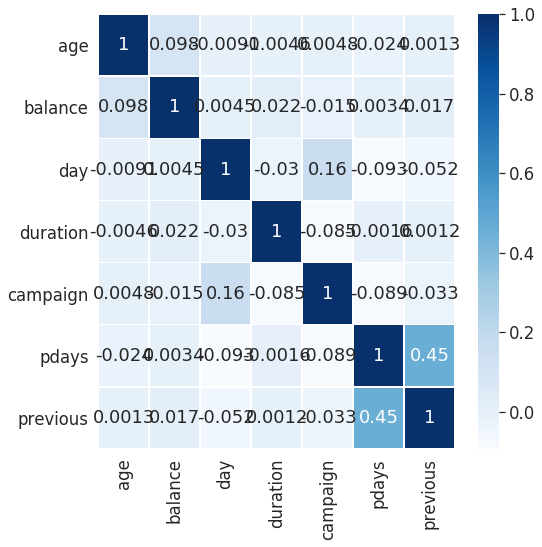

In [26]:
# Visualize the correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(tds.corr(), annot=True, cmap='Blues', linewidths=0.5)

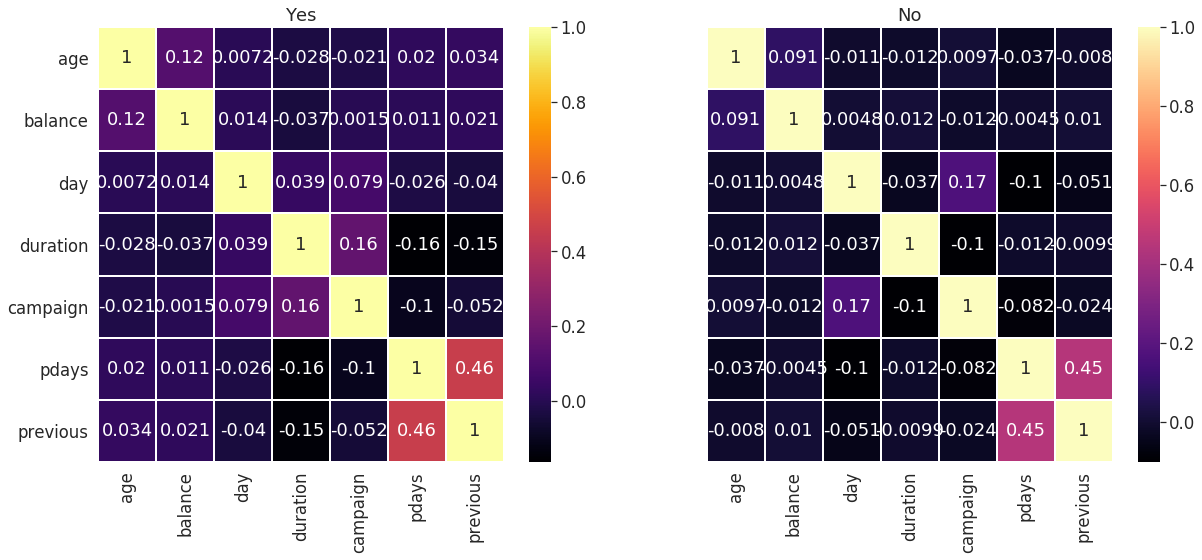

In [27]:
# Visualize the correlation matrix in each Outcomes category
f, axes = plt.subplots(ncols=2, sharey=True, figsize=(20,8))
axes[0].set_title('Yes')
sns.heatmap(tds[tds.Target == 'yes'].iloc[:,:-1].corr(), annot=True, cmap='inferno', linewidths=1, ax=axes[0])
axes[1].set_title('No')
sns.heatmap(tds[tds.Target == 'no'].iloc[:,:-1].corr(), annot=True, cmap='magma', linewidths=1, ax=axes[1])

---
## Deliverable - 2 (Prepare the data for analytics)
1. Load the data into a data-frame. The data frame should have data and column description
Ensure the attribute types are correct. If not, take appropriate actions
3. Transform the data ie. scale/normalize if required
4. Create the training set and test set in ratio of 70:30

### Feature Engineering
Feature Engineering is the process of cleaning and refining the crude data and transform to some format which machines can understand. The efforts main have two goals
- Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
- Improving the performance of machine learning models

Most of the Machine Learning algorithms are only good at numbers. So, in order to feed them the categorical data that we have, we need to convert them into numerical values using any of the Text Encoder
• One Hot Encoding
• Label Encoding

#### LabelEncode the categorical variables
LabelEncoder() encodes labels with a value between 0 and (n-1) where n is the number of distinct labels in a column. If a label repeats, it assigns the same value to it as assigned earlier.

In [28]:
# Convert all the categorical columns to numerical
le = LabelEncoder()
for col in categ_cols:
    tds[col] = le.fit_transform(tds[col])
    print(f'{col}:', dict(zip(le.classes_, range(len(le.classes_)))))
    
print()
tds.info()

job: {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
marital: {'divorced': 0, 'married': 1, 'single': 2}
education: {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
default: {'no': 0, 'yes': 1}
housing: {'no': 0, 'yes': 1}
loan: {'no': 0, 'yes': 1}
contact: {'cellular': 0, 'telephone': 1, 'unknown': 2}
month: {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
poutcome: {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}
Target: {'no': 0, 'yes': 1}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int64
marital      45211 non-null int64
education    45211 non-null int64
default      45211 non-null int64
balance      45211 non-null int64

#### Feature Scaling
Algorithms that exploit distances or similarities between data samples, such as k-NN and SVM, are sensitive to scale of the features. Other graphical-model based classifiers are invariant to feature scaling, but still it might be a good idea to rescale/standartize your data.

StandardScaler() will normalize the features so that each column/feature/variable will have mean = 0 and standard deviation = 1. 

In [29]:
X = tds.drop('Target', axis=1)
y = tds.Target
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


#### Sample spliting
Divide the dataset into train-test in a ratio of 70:30 for training set and test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31647, 16), (13564, 16), (31647,), (13564,))

From the Exploratory Data Analysis, it is derived that our dataset is having an highly imbalanced data with alomost 1:7 ratio between both the Target classes. It is not going to help us devise an optimal marketing plan based on predicted outcome. The issue with imbalanced data is biased predictions and misleading accuracy. Hence we need to balance out the dataset by oversampling the minority class.
### SMOTE (Synthetic Minority Oversampling Technique)
This method helps avoiding the over-fitting problem and is considered a state-of-art technique and works well in various applications. It generates synthetic data based on the feature space similarities between existing minority instances. In order to create a synthetic instance, it finds the K-nearest neighbors of each minority instance, randomly selects one of them, and then calculate linear interpolations to produce a new minority instance in the neighborhood.

We will apply SMOTE on training dataset to balance both the target class out.

Value Counts:
0    27909
1     3738
Name: Target, dtype: int64


([<matplotlib.patches.Wedge at 0x7ff0de4c3198>,
 [Text(-0.43513620453809443, -1.1183275385593354, '0'),
  Text(0.39887492614486764, 1.0251335490037026, '1')],
 [Text(-0.25382945264722173, -0.652357730826279, '88.2%'),
  Text(0.21756814153356413, 0.5591637540020196, '11.8%')])

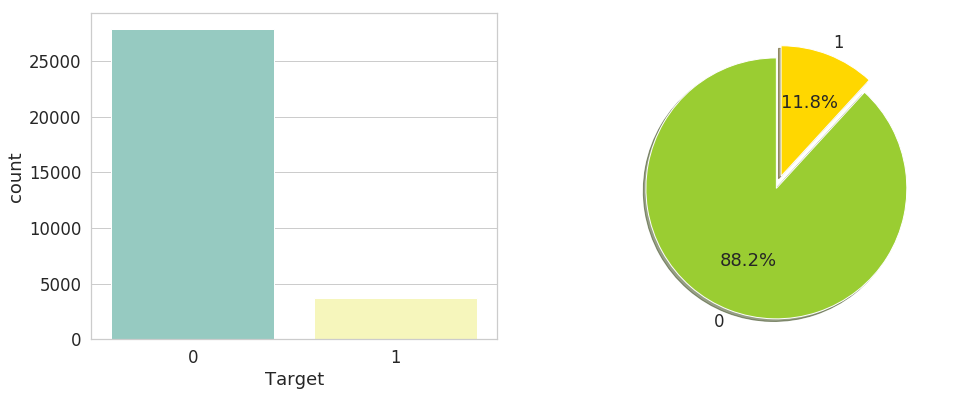

In [31]:
# Check the frequency distribution of 'No (0)' vs 'Yes (1)' before applying SMOTE
print('Value Counts:\n%s' % y_train.value_counts())
fig1, axes = plt.subplots(1, 2, figsize=(16,6))
sns.countplot(y_train, ax=axes[0], palette="Set3")
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
axes[1].pie(y_train.value_counts(), explode=(0.1, 0), labels=y_train.unique(), 
            autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)

In [32]:
sm = SMOTE(random_state=1)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)
print('Synthesized %d samples from SMOTE' % (len(y_train_resample) - len(y_train)))

Synthesized 24171 samples from SMOTE


([<matplotlib.patches.Wedge at 0x7ff0de445438>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, '0'),
  Text(1.1, -2.6942229581241775e-16, '1')],
 [Text(-0.7, 8.572527594031472e-17, '50.0%'),
  Text(0.6, -1.4695761589768238e-16, '50.0%')])

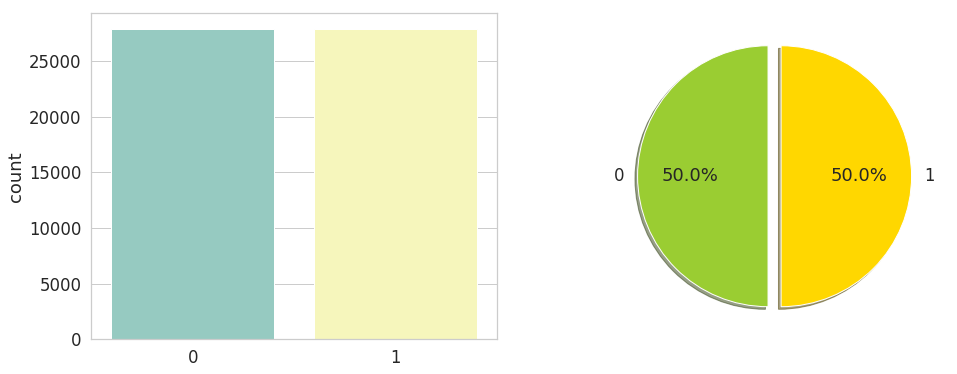

In [33]:
# Check the frequency distribution of 'No (0)' vs 'Yes (1)' after applying SMOTE
fig1, axes = plt.subplots(1, 2, figsize=(16,6))
sns.countplot(y_train_resample, ax=axes[0], palette="Set3")
cls, cnt = np.unique(y_train_resample, return_counts=True)
axes[1].pie(cnt, explode=(0.1, 0), labels=cls, autopct='%1.1f%%', shadow=True, startangle=90,colors=colors)

## Deliverable - 3 (Model Creation)
1. Write python code using scikit learn, pandas, numpy and others in Jupyter notebook to train and test the ensemble model
2. First create a model using standard classification algorithm. Note the model performance
3. Use appropriate algorithm/s and explain why that algorithm in the comment lines
4. Evaluate the model. Use confusion matrix to evaluate class level metrics i.e. Precision and recall. Also reflect the overall score of the model
5. Advantages and disadvantages of the algorithm
6. Build the ensemble models and compare the results with the base model. Note: Random forest can be used only with Decision Trees



In [0]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

In [0]:
# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

In [0]:
# Let's create a generic method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, prec_rcl=True):
    timer.start()
    # train the model
    clf = estimator.fit(X_train, y_train)
    # predict from the claffier
    y_pred = clf.predict(X_test)
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train, clf.predict(X_train)) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')
    if prec_rcl:
        print('='*80)
        print('Precision-Recall curve of "Yes" records')
        # predict probabilities
        y_proba = clf.predict_proba(X_test)
        # keep probabilities for the positive outcome only  probs[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_test,  y_proba[:, 1])
        plot_prec_recall_vs_thresh(precision, recall, thresholds)

### Non-Ensemble Classifiers
We will first run the below regularized classfiers, not from ensemble family separately one after another and check which algorithm performs better and is a good candidate to be a week estimator for ensembling.
 - Logistic Regression
 - Gaussian Naive Bayes
 - Support Vector Machine
 - K-Nearest Neighbors
 - Stochastic Gradient Descent
 - Decision Tree

In [37]:
# Run Classification for Logistic Regression
run_classification(LogisticRegression(penalty='l1', C=0.5), 
                   X_train_resample, X_test, y_train_resample, y_test, False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Estimator: LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Training accuracy: 81.38%
Testing accuracy: 80.61%
Confusion matrix:
 [[9724 2289]
 [ 341 1210]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     12013
           1       0.35      0.78      0.48      1551

    accuracy                           0.81     13564
   macro avg       0.66      0.79      0.68     13564
weighted avg       0.90      0.81      0.83     13564

Time taken: 0.366244s to run the model


Estimator: GaussianNB(priors=None, var_smoothing=1e-09)
Training accuracy: 75.05%
Testing accuracy: 66.96%
Confusion matrix:
 [[7774 4239]
 [ 242 1309]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78     12013
           1       0.24      0.84      0.37      1551

    accuracy                           0.67     13564
   macro avg       0.60      0.75      0.57     13564
weighted avg       0.89      0.67      0.73     13564

Time taken: 0.088772s to run the model
Precision-Recall curve of "Yes" records


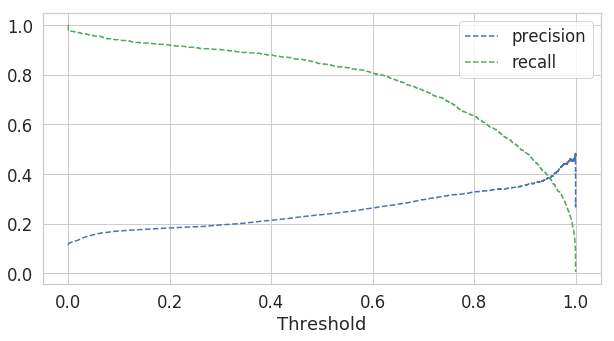

In [38]:
# Run Classification for Gaussian Naive Bayes Classifier
run_classification(GaussianNB(), 
                   X_train_resample, X_test, y_train_resample, y_test)

In [39]:
# Run Classification for Support Vector Classifier
run_classification(SVC(C= 1, kernel='rbf', gamma= 1), 
                   X_train_resample, X_test, y_train_resample, y_test, False)

Estimator: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Training accuracy: 98.89%
Testing accuracy: 87.51%
Confusion matrix:
 [[11459   554]
 [ 1140   411]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     12013
           1       0.43      0.26      0.33      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.61      0.63     13564
weighted avg       0.85      0.88      0.86     13564

Time taken: 595.924881s to run the model


Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Training accuracy: 94.21%
Testing accuracy: 83.11%
Confusion matrix:
 [[10192  1821]
 [  470  1081]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     12013
           1       0.37      0.70      0.49      1551

    accuracy                           0.83     13564
   macro avg       0.66      0.77      0.69     13564
weighted avg       0.89      0.83      0.85     13564

Time taken: 35.439060s to run the model
Precision-Recall curve of "Yes" records


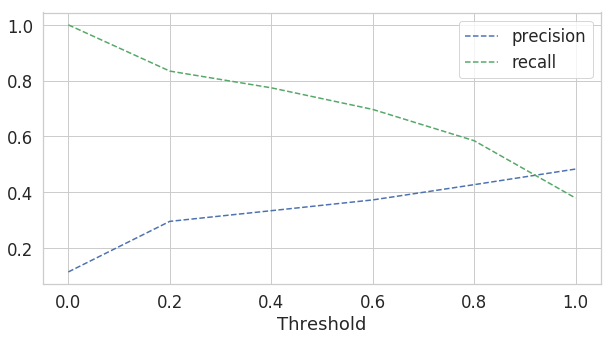

In [40]:
# Run Classification for Gaussian Naive Bayes Classifier
run_classification(KNeighborsClassifier(n_neighbors=5), 
                   X_train_resample, X_test, y_train_resample, y_test)

Estimator: SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=1, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Training accuracy: 81.43%
Testing accuracy: 80.52%
Confusion matrix:
 [[9707 2306]
 [ 336 1215]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     12013
           1       0.35      0.78      0.48      1551

    accuracy                           0.81     13564
   macro avg       0.66      0.80      0.68     13564
weighted avg       0.90      0.81      0.83     13564

Time taken: 0.210979s to run the model
Precision-Recall curve of "Yes" records


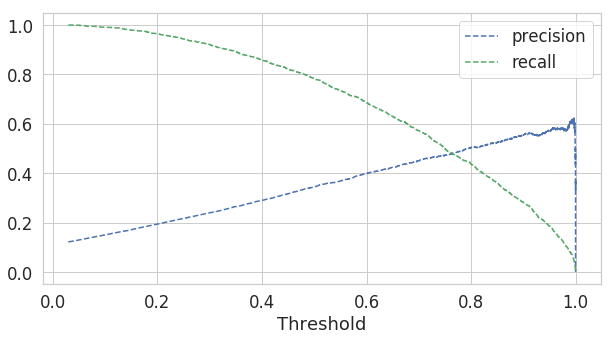

In [41]:
# Run Classification for Gaussian Naive Bayes Classifier
run_classification(SGDClassifier(loss='log', alpha=0.001, l1_ratio=1), 
                   X_train_resample, X_test, y_train_resample, y_test)

Estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Training accuracy: 84.88%
Testing accuracy: 82.41%
Confusion matrix:
 [[9982 2031]
 [ 355 1196]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89     12013
           1       0.37      0.77      0.50      1551

    accuracy                           0.82     13564
   macro avg       0.67      0.80      0.70     13564
weighted avg       0.90      0.82      0.85     13564

Time taken: 0.358073s to run the model
Precision-Recall curve of "Yes" records


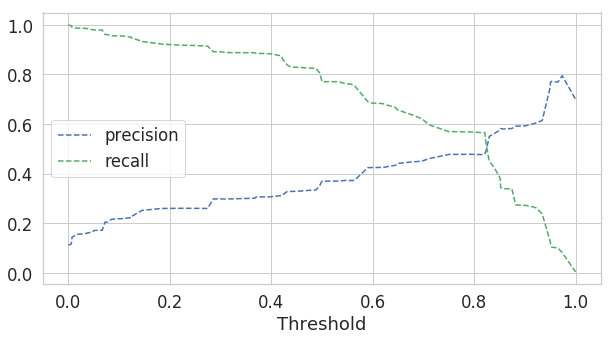

In [42]:
# Run Classification for Gaussian Naive Bayes Classifier
run_classification(DecisionTreeClassifier(criterion='gini', max_depth=7), 
                   X_train_resample, X_test, y_train_resample, y_test)

## Ensemble Techniques
Ensemble is the art of combining diverse set of learners (individual models) together to improvise on the stability and predictive power of the model.

Advantages of ensemble methods:
- Intuitively, ensembles allow the different needs of a difficult problem to be handled by hypotheses suited to those particular needs.
- Mathematically, ensembles provide an extra degree of freedom in the classical bias/variance tradeoff, allowing solutions that would be difficult (if not impossible) to reach with only a single hypothesis.
- They’re unlikely to overfit.

### Bagging
Bagging or Bootstrap Aggregating is an ensembling algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems. It follows the typical bagging technique to make predictions. Decision Tree is used as the default base estimator unless specified otherwise. Following are the steps for the bagging meta-estimator algorithm:
1. Random subsets are created from the original dataset (Bootstrapping).
2. The subset of the dataset includes all features.
3. A user-specified base estimator is fitted on each of these smaller sets.
4. Predictions from each model are combined to get the final result.

Estimator: BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
Training accuracy: 99.72%
Testing accuracy: 88.92%
Confusion matrix:
 [[11196   817]
 [  686   865]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     12013
           1       0.51      0.56      0.54      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.74      0.74     13564
weighted avg       0.89      0.89      0.89     13564

Time taken: 3.831315s to run the model
Precision-Recall curve of "Yes" records


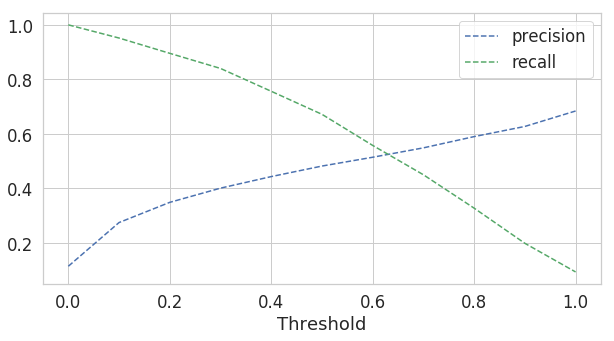

In [43]:
run_classification(BaggingClassifier(), 
                   X_train_resample, X_test, y_train_resample, y_test)

### Bagging with SVC as estimator
Bagging ensembling with Support Vector Classifier as the base estomator. The accuracy score of SVC is more as compared to other non-ensemble classifiers, so is the reason I chose SVC to be used as the base estimator of Bagging.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

Estimator: BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
Training accuracy: 87.87%
Testing accuracy: 82.84%
Confusion matrix:
 [[9985 2028]
 [ 300 1251]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90     12013
           1       0.38      0.81      0.52      1551

    accurac

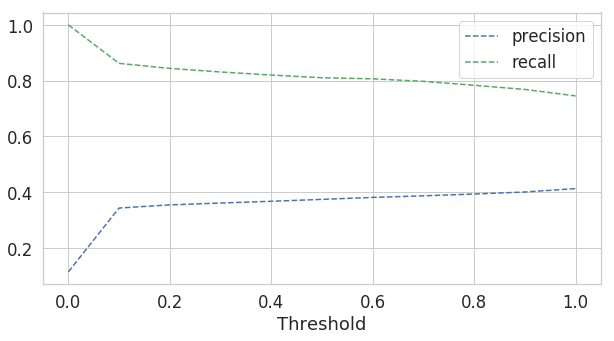

In [44]:
run_classification(BaggingClassifier(base_estimator=SVC()), 
                   X_train_resample, X_test, y_train_resample, y_test)

### Adaptive Boosting
Adaptive boosting or AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.<br/>
Below are the steps for performing the AdaBoost algorithm:
1. Initially, all observations in the dataset are given equal weights.
2. A model is built on a subset of data.
3. Using this model, predictions are made on the whole dataset.
4. Errors are calculated by comparing the predictions and actual values.
5. While creating the next model, higher weights are given to the data points which were predicted incorrectly.
6. Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
7. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.

Estimator: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Training accuracy: 88.78%
Testing accuracy: 86.15%
Confusion matrix:
 [[10597  1416]
 [  463  1088]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92     12013
           1       0.43      0.70      0.54      1551

    accuracy                           0.86     13564
   macro avg       0.70      0.79      0.73     13564
weighted avg       0.90      0.86      0.87     13564

Time taken: 3.849858s to run the model
Precision-Recall curve of "Yes" records


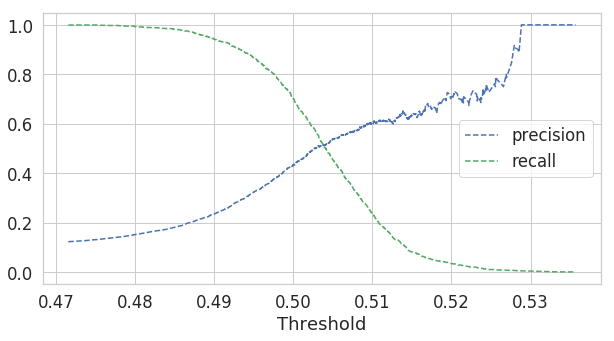

In [45]:
run_classification(AdaBoostClassifier(), 
                   X_train_resample, X_test, y_train_resample, y_test)

### Random Forest
Random Forest is another ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.<br/>
Following are the steps of the Random Forest algorithm:
1. Random subsets are created from the original dataset (bootstrapping).
2. At each node in the decision tree, only a random set of features are considered to decide the best split.
3. A decision tree model is fitted on each of the subsets.
4. The final prediction is calculated by averaging the predictions from all decision trees.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training accuracy: 99.79%
Testing accuracy: 89.21%
Confusion matrix:
 [[11267   746]
 [  718   833]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     12013
           1       0.53      0.54      0.53      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.74      0.74     13564
weighted avg       0.89      0.89      0.89     13564

Time taken: 1.276520s to run the model
Precisio

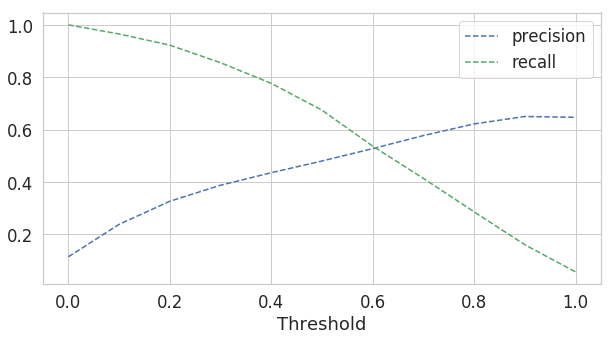

In [46]:
run_classification(RandomForestClassifier(), 
                   X_train_resample, X_test, y_train_resample, y_test)

### Gradient Boosting Classifier (GBM)
Gradient Boosting is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

Estimator: GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Training accuracy: 91.68%
Testing accuracy: 87.95%
Confusion matrix:
 [[10803  1210]
 [  425  1126]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     12013
           1       0.48      0.73      0.58      1551

    accuracy            

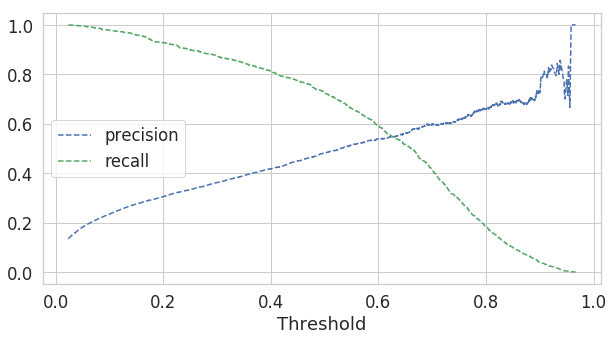

In [47]:
run_classification(GradientBoostingClassifier(), 
                   X_train_resample, X_test, y_train_resample, y_test)

**Observations:**

Of all the various classifiers along with ensembling techniques used to explore the dataset after balancing, it is observed that all the standalone classifiers are poor in terms of performance than ensemble methods. Which proves the theory that ensembling week classifiers will tend to cancel each others variance error and perform ahead in bias-variance tradeoff. So is the reason they score high than standalone classifiers.

The outcome of **Bagging Classifier**, **Gradient Boosting Classifier** and **Random Forest Classifier** seems promising. Since there is a difference of 10% in the train and test score of Random Forest classifier, assuming this model has been overfitted. BaggingClassifier with DecisionTree as the base estimator has the highest accuracy with testing data and training data and this model's prediction can be used for marketing the term deposits by the bank.

---
## Deliverable - 4 (Tuning the model)

1. Discuss some of the key hyper parameters available for the selected algorithm. What values did you initialize these parameters to
2. Regularization techniques used for the model
3. Range estimate at 95% confidence for the model performance in production

### Tuning Bagging Classifier
The overall important parameters for BaggingClassifier are:
- **n_estimators**
  - The number of sequential trees to be modeled
  - Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
- **max_samples**
  - The number of samples to draw from X to train each base estimator.
- **max_features**
  - The number of features to consider while searching for a best split. These will be randomly selected.
  - As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
  - Higher values can lead to over-fitting but depends on case to case.
- **oob_score**
  - Whether to use out-of-bag samples to estimate the generalization error.

In [48]:
# Run GridSearch to tune the hyper-parameter
timer.start()
grid_bag = GridSearchCV(BaggingClassifier(), 
                    param_grid={ 'n_estimators': [10, 15, 20, 25, 30] }, 
                    cv=5, n_jobs=1, iid=False)
grid_bag.fit(X_train_resample, y_train_resample)
print('Best hyper parameter:', grid_bag.best_params_)
print(timer.stop(), 'to tune the best hyper-parameter for Gradient Boosting classifier')

Best hyper parameter: {'n_estimators': 30}
Time taken: 150.474266s to tune the best hyper-parameter for Gradient Boosting classifier


Estimator: BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=30,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
Training accuracy: 99.97%
Testing accuracy: 89.35%
Confusion matrix:
 [[11151   862]
 [  582   969]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     12013
           1       0.53      0.62      0.57      1551

    accuracy                           0.89     13564
   macro avg       0.74      0.78      0.76     13564
weighted avg       0.90      0.89      0.90     13564

Time taken: 11.490729s to run the model
Precision-Recall curve of "Yes" records


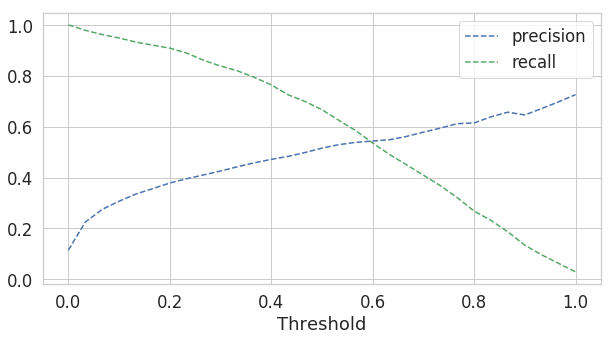

In [49]:
# Use the tuned estimator from GridSearch to run the classification
run_classification(grid_bag.best_estimator_, 
                   X_train_resample, X_test, y_train_resample, y_test)

### Tuning Gradient Boosting
The overall parameters of GradientBoostingClassifier can be divided into 3 categories:
1. **Tree-Specific Parameters**: These affect each individual tree in the model.
  - **min_samples_split**
    - Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
    - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
    - Too high values can lead to under-fitting hence, it should be tuned using CV.
  - **min_samples_leaf**
    - Defines the minimum samples (or observations) required in a terminal node or leaf.
    - Used to control over-fitting similar to min_samples_split.
    - Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.
  - **min_weight_fraction_leaf**
    - Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
    - Only one of #2 and #3 should be defined.
  - **max_depth**
    - The maximum depth of a tree.
    - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    - Should be tuned using CV.
  - **max_leaf_nodes**
    - The maximum number of terminal nodes or leaves in a tree.
    - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
    - If this is defined, GBM will ignore max_depth.
  - **max_features**
    - The number of features to consider while searching for a best split. These will be randomly selected.
    - As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
    - Higher values can lead to over-fitting but depends on case to case.
2. **Boosting Parameters**: These affect the boosting operation in the model.
  - **learning_rate**
    - This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
    - Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
    - Lower values would require higher number of trees to model all the relations and will be computationally expensive.
  - **n_estimators**
    - The number of sequential trees to be modeled
    - Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
  - **subsample**
    - The fraction of observations to be selected for each tree. Selection is done by random sampling.
    - Values slightly less than 1 make the model robust by reducing the variance.
    - Typical values ~0.8 generally work fine but can be fine-tuned further.
3. **Miscellaneous Parameters**: Other parameters for overall functioning.
  - **loss**
    - It refers to the loss function to be minimized in each split.
    - It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.
  - **init**
    - This affects initialization of the output.
    - This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.
  - **random_state**
    - The random number seed so that same random numbers are generated every time.
    - This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
    - It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.
  - **verbose**
    - The type of output to be printed when the model fits. The different values can be:
    - 0: no output generated (default)
    - 1: output generated for trees in certain intervals
    - \>1: output generated for all trees
  - **warm_start**
    - This parameter has an interesting application and can help a lot if used judicially.
    - Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications
  - **presort **
    - Select whether to presort data for faster splits.
    - It makes the selection automatically by default but it can be changed if needed.

In [50]:
# Run GridSearch to tune the hyper-parameter
timer.start()
grid_params = [
    {
        'learning_rate': [0.05, 0.1, 0.5], 
        'min_samples_split': [2, 3, 4], 
        'min_samples_leaf': [1], 
        'max_depth': [3, 4, 5]
    }
]
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_params, cv=5, n_jobs=1, iid=False)
grid_gb.fit(X_train_resample, y_train_resample)
print('Best hyper parameter:', grid_gb.best_params_)
print(timer.stop(), 'to tune the best hyper-parameter for Gradient Boosting classifier')

Best hyper parameter: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
Time taken: 932.332147s to tune the best hyper-parameter for Gradient Boosting classifier


Estimator: GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Training accuracy: 94.37%
Testing accuracy: 89.66%
Confusion matrix:
 [[11124   889]
 [  513  1038]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     12013
           1       0.54      0.67      0.60      1551

    accuracy            

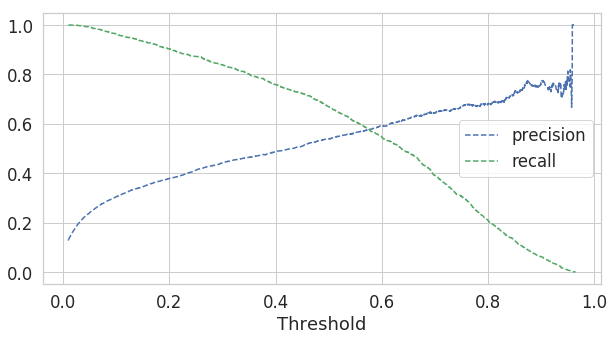

In [51]:
# Use the tuned estimator from GridSearch to run the classification
run_classification(grid_gb.best_estimator_, 
                   X_train_resample, X_test, y_train_resample, y_test)

## Conclusion
- Out of all algorithms, **GradientBoosting Classifier** has best performance. The test accuracy of tuned Gradient boosting ensemble classifier is 89.66% which is best among all other ensemble techniques. 
- Hence concluding this hyper-parameter tuned Gradient Boosting ensemble technique can be used to predict the potential client who can subscribe the Portugese Banks term deposit plan.